In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [3]:
class_table = pd.read_csv('../datasets/class_table.csv', index_col=0)
major_classes = class_table[class_table['num_objects'] >= 38]
major_classes.sort_values(by=['num_objects'], ascending=False)

,index,class_name,num_objects
89,89,male,2518
55,55,female,1024
12,12,bird,477
70,70,hat,299
148,148,tree,243
45,45,dog,208
73,73,horse,192
25,25,building,188
35,35,chair,181
160,160,window,178


/tudelft.net/staff-umbrella/StudentsCVlab/haoranwang/envs/pytorch/lib/python3.7/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)
/tudelft.net/staff-umbrella/StudentsCVlab/haoranwang/envs/pytorch/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


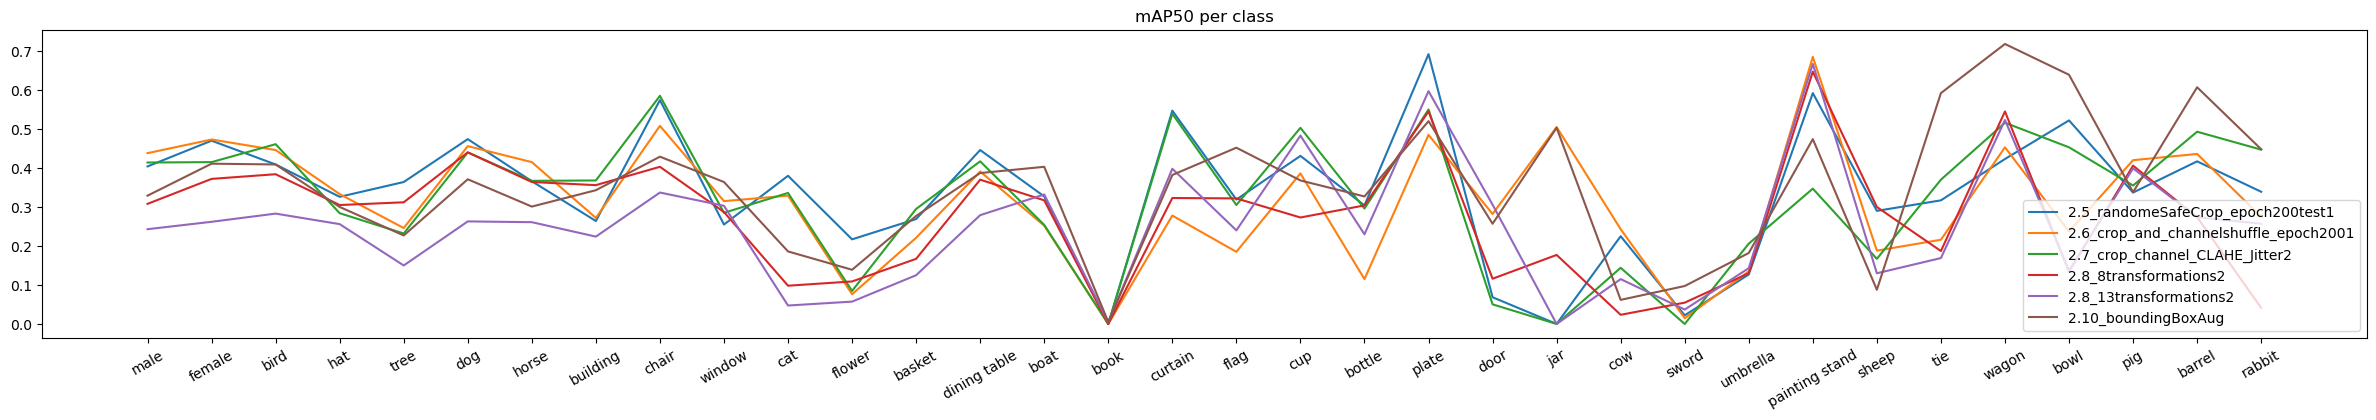

In [15]:
# file list
file_list = ['children_books/2.4_all_classes_500_objects_epoch2001/results_per_class.csv', 
             'children_books/2.5_randomeSafeCrop_epoch200test1/results_per_class.csv',
             'children_books/2.6_crop_and_channelshuffle_epoch2001/results_per_class.csv',
             'children_books/2.7_crop_channel_CLAHE_Jitter2/results_per_class.csv',
             'children_books/2.8_8transformations2/results_per_class.csv',
             'children_books/2.8_13transformations2/results_per_class.csv',
             'children_books/2.10_boundingBoxAug/results_per_class.csv']

legend_list = [file_list[i].split('/')[1] for i in range(len(file_list))]


y = []
for file in file_list:
    results_per_class = pd.read_csv(file, index_col=0, sep='\s{2,}')

    for index, row in major_classes.iterrows():
        class_name = row['class_name']
        if class_name in results_per_class.index:
            major_classes.loc[index, 'mAP50'] = results_per_class.loc[class_name, 'mAP50']

    sorted_classes = major_classes.sort_values(by=['num_objects'], ascending=False)

    x = sorted_classes['class_name']
    y.append(sorted_classes['mAP50'])


plt.figure(figsize=(30,4))
for i in range(1, len(y)):
    plt.plot(x, y[i], label=legend_list[i])
plt.xticks(rotation=30)
plt.legend()
plt.title('mAP50 per class')
plt.savefig('plots/mAP50_per_class.png', bbox_inches='tight')